In [67]:
import pandas as pd
import numpy as np
#from bokeh.charts import BoxPlot, show, defaults, Histogram, Bar
#from bokeh.layouts import row, column
import seaborn  as sns
#from bokeh.charts import BoxPlot, show, defaults, Histogram, Bar
#from bokeh.layouts import row, column
import matplotlib.pyplot as plt
#from IPython.display import Image

import matplotlib.pyplot as plt
# import openpyxl as oxl
import math
import json
import time as t
# experiment
from pylab import rcParams

# from pylab import rcParams
# import everything needed
%matplotlib inline
%config IPCompleter.greedy=True

In [21]:
data_long = pd.read_excel("/Users/dilruba_p/Desktop/dataset_576_long.xlsx")
df = data_long.copy()

In [22]:
del df["anemia_who" ]
del df["bun"]
del df["cl"]
del df["co2"]
del df["fasting"]
del df["k"]
del df["na"]
del df["anticoagulant_rx"]
del df["osteoporosis_rx"]
del df["antiasthmatic_rx"]
del df["antihistamine_rx"]
del df["coughcoldallergy_rx"]
del df["nasal_rx"]
del df["alternative_rx"]
del df["cartilage_base_rx"]
del df["fish_oil_supplement_rx"]
del df["glucosamine_rx"]
del df["herbals_rx"]
del df["diabetes_rx"]
del df["antacid_rx"]
del df["antidiarrheal_rx"]
del df["antinausea_rx"]
del df["antireflux_rx"]
del df["laxative_rx"]
del df["musculoskeletal_rx"]
del df["ophthalmic_rx"]
del df["otic_rx"]
del df["respiratory_rx"]
del df["supplement_rx"]
del df["urinary_rx"]
del df["acetaminophen_rx"]
del df["antiinfective_rx"]
del df["vaccine_rx"]
del df["antiarrhythmic_rx"]
del df["rdw"]
del df["tga"]
del df["tsh"]
del df["wbc"]
del df["confid_health"]
del df["confid_instit"]
del df["finfintot"]
del df["finhlthtot"]
del df["finuctot"]
del df["fraud7"]
del df["scam"]
del df["gamma"]
del df["risk"]
del df["large_alpha"]
del df["small_alpha"]
del df["fin_literacy_pct"]
del df["health_literacy_pct"]
del df["literacy_total_pct"]
del df["thyroid_cum"]
del df["chf_cum"]
del df["heart_cum"]
del df["antibiotic_rx"]
del df["antihyp_all_rx"]
del df["antineoplastic_rx"]
del df["cardiac_rx"]
del df["dental_rx"]
del df["dermatologic_rx"]
del df["endocrine_rx"]
del df["gastrointestinal_rx"]
del df["hemotologic_rx"]
del df["lipid_lowering_rx"]

In [23]:
#medications with analgesic_rx
df = df[df.analgesic_rx !=1]
#removing people who have a suspected of having head injuries in past visits 
df = df[df.headinjrloc_cum !=1]
#removing people who have a suspected of having cancer in past visits 
df = df[df.cancer_cum !=1]
#removing people who have a suspected of having diabetes in past visits 
df = df[df.dm_cum !=1]
print(df.shape)

##there might be other 

(3594, 138)


In [24]:
def groupbyid(df):
    
    #create a list of dataframes, each element of the list contains a dataframe
    #that is grouped by ID

    # convert the values from the projid to a list
    projid_all = df.projid.unique()
    projid_list = projid_all.tolist() # a unique list of ID  acquired 

    patient_dfbyid = []
    start_df_row = 0 # selecting the first row 
    end_df_row   = 0 # selecting the last row
    flag_start   = 0 # start index for df spliting based on unique ID
    df = df.reset_index(drop = True) # df reindexed

   
    for p_id in projid_all: # loop through the unique id list
        for df_index in range(flag_start, df.shape[0]): 
            if df.iloc[df_index]['projid'] == p_id:
                end_df_row += 1
            elif df.iloc[df_index]['projid'] != p_id:
                break
      
        patient_dfbyid.append(df[start_df_row: end_df_row])
        start_df_row = end_df_row
        flag_start = end_df_row

   
    return patient_dfbyid # a list of df, that each element of the list is one patient
#-------------------------------------------------------------------------------------------------
def patient_diagnosis(patient_dfbyid):
 
    patient_dfbyid_diagnosed = []      #  diagnosed with alzheimer
    patient_dfbyid_not_diagnosed = []  # not diagnalzheimer
    diagonosed = False

    for patient in list_of_patient:
        dcfdx_list = patient['dcfdx'].tolist()
        for dcfdx_element in dcfdx_list:
            if dcfdx_element >= 4: # >= 4 means diagnoised
                diagonosed = True
                break
        if (diagonosed) == True:
            patient_dfbyid_diagnosed.append(patient)
            diagonosed= False
        else:
            patient_dfbyid_not_diagnosed.append(patient)
    
    return patient_dfbyid_diagnosed, patient_dfbyid_not_diagnosed

#-----------------------------------------

def group_bydcfdxlevel(df): # based on the parameter DF, create 2 DF, based on
                            # the value of "dcfdx". smaller or larger than 4
    dcfdx_split = 4  
    df=pd.DataFrame(df)
    df = df.reset_index(drop = True)  
    
    df_column_names = list(df)
    total_rows = df.shape[0]

    diagnosed_level = pd.DataFrame(columns=df_column_names) 
    not_diagnosed_level= pd.DataFrame(columns=df_column_names)

    for row in range(0, total_rows):  # loop through all the rows in the DF
        if df.iloc[row]['dcfdx'] >= dcfdx_split:
            # takes rows  with dcfdx level  greater or equal to 4
            diagnosed_level = diagnosed_level.append(df.iloc[row], ignore_index= True)
        elif df.iloc[row]['dcfdx'] < dcfdx_split:
            # get the df row that is smaller than 4
            not_diagnosed_level = not_diagnosed_by_level.append(df.iloc[row], ignore_index= True)
        else:
            continue
    
    return diagnosed_level, not_diagnosed_level


In [25]:
list_of_patient = groupbyid(df)
print("DF grouped dtype = list, total patient count is: " \
+ str(len(list_of_patient)))

# 2 very important asset, all the manipulation use these 2
patient_dfbyid_diagnosed, patient_dfbyid_not_diagnosed = \
patient_diagnosis(list_of_patient)
print("Patients diagnosed with or without the disease are separeted into 2" )
print("Number of patient diagnosed with Alz = " + str(len(patient_dfbyid_diagnosed)))
print("Number of patients  not diagnosed with Alz = " + str(len(patient_dfbyid_not_diagnosed)))

DF grouped dtype = list, total patient count is: 1189
Patients diagnosed with or without the disease are separeted into 2
Number of patient diagnosed with Alz = 271
Number of patients  not diagnosed with Alz = 918


In [26]:
def imputemean_per_id(list_of_df_temp,focus = "crn"):
    list_of_df = list_of_df_temp[:]
    for df in list_of_df:
      
        M = df[focus].mean()
        df[focus].fillna(M,inplace=True)
          
    return list_of_df

In [27]:
imputed_df_list=imputemean_per_id(list_of_patient)

In [28]:
list_of_columns = ['chlstrl','crn','gfr_mdrs','glucose','hba1c','hdlchlstrl', 'hdlratio','hemacrit','hemoglbn',
'ldlchlstrl',
'mch',
'mchc',
'mcv',
'platelet', 'rbc']

analysis_result_DF_list = []
counter = 0
for column_names in list_of_columns:
    print("looped {}".format(column_names))
    result_list_of_df = imputemean_per_id(list_of_patient,column_names)
    

looped chlstrl
looped crn
looped gfr_mdrs
looped glucose
looped hba1c
looped hdlchlstrl
looped hdlratio
looped hemacrit
looped hemoglbn
looped ldlchlstrl
looped mch
looped mchc
looped mcv
looped platelet
looped rbc


AttributeError: 'list' object has no attribute 'to_json'

In [29]:
def output_table_xlsx(df, output_filename): # dataframe, string
    """
    helper function to output df back to xlsx
    to get a better view of all the columns
    """
    writer_excel = pd.ExcelWriter(output_filename + ".xlsx")
    df.to_excel(writer_excel, 'Sheet1')
    print ("file created")

In [30]:
def appending_initial_df_to_full_df(list_of_df):
    list_of_df_copy = list_of_df[:]
    counter = 0
    for df in list_of_df_copy[1:]:
        counter+=1
        print("appending{}".format(counter))
        list_of_df_copy[0] = list_of_df_copy[0].append(df, ignore_index=True)
    return list_of_df_copy[0]

df_everypatient = appending_initial_df_to_full_df(result_list_of_df)

appending1
appending2
appending3
appending4
appending5
appending6
appending7
appending8
appending9
appending10
appending11
appending12
appending13
appending14
appending15
appending16
appending17
appending18
appending19
appending20
appending21
appending22
appending23
appending24
appending25
appending26
appending27
appending28
appending29
appending30
appending31
appending32
appending33
appending34
appending35
appending36
appending37
appending38
appending39
appending40
appending41
appending42
appending43
appending44
appending45
appending46
appending47
appending48
appending49
appending50
appending51
appending52
appending53
appending54
appending55
appending56
appending57
appending58
appending59
appending60
appending61
appending62
appending63
appending64
appending65
appending66
appending67
appending68
appending69
appending70
appending71
appending72
appending73
appending74
appending75
appending76
appending77
appending78
appending79
appending80
appending81
appending82
appending83
appending84
a

appending672
appending673
appending674
appending675
appending676
appending677
appending678
appending679
appending680
appending681
appending682
appending683
appending684
appending685
appending686
appending687
appending688
appending689
appending690
appending691
appending692
appending693
appending694
appending695
appending696
appending697
appending698
appending699
appending700
appending701
appending702
appending703
appending704
appending705
appending706
appending707
appending708
appending709
appending710
appending711
appending712
appending713
appending714
appending715
appending716
appending717
appending718
appending719
appending720
appending721
appending722
appending723
appending724
appending725
appending726
appending727
appending728
appending729
appending730
appending731
appending732
appending733
appending734
appending735
appending736
appending737
appending738
appending739
appending740
appending741
appending742
appending743
appending744
appending745
appending746
appending747
appending748

In [31]:
print(df_everypatient)

        projid study  fu_year scaled_to    ca     chlstrl       crn  \
0         9121  MAP         1    ROSMAP   NaN  215.400000  0.878000   
1         9121  MAP         2    ROSMAP   9.4  205.000000  0.980000   
2         9121  MAP         3    ROSMAP   9.4  230.000000  0.890000   
3         9121  MAP         4    ROSMAP   9.2  210.000000  0.820000   
4         9121  MAP         5    ROSMAP   8.8  201.000000  0.850000   
5         9121  MAP         6    ROSMAP   9.1  231.000000  0.850000   
6       285563  MAP         2    ROSMAP   9.9  230.000000  0.800000   
7       285563  MAP         5    ROSMAP   9.4  263.000000  0.860000   
8       285563  MAP         6    ROSMAP   9.4  276.000000  0.990000   
9       285563  MAP         7    ROSMAP   9.3  232.000000  0.780000   
10      285563  MAP         9    ROSMAP   9.7  246.000000  0.900000   
11      381112  ROS         0    ROSMAP   NaN  150.000000  0.940000   
12      381112  ROS         3    ROSMAP   9.5  150.000000  0.940000   
13    

/Users/dilruba_p/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


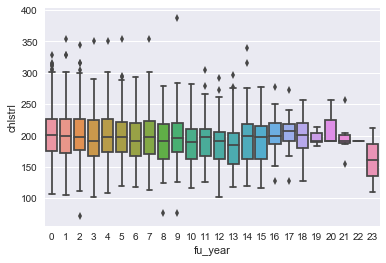

In [32]:
ax = sns.boxplot(x="fu_year", y="chlstrl", data=df_everypatient)

In [33]:
print(len(list_of_columns))

15


/Users/dilruba_p/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


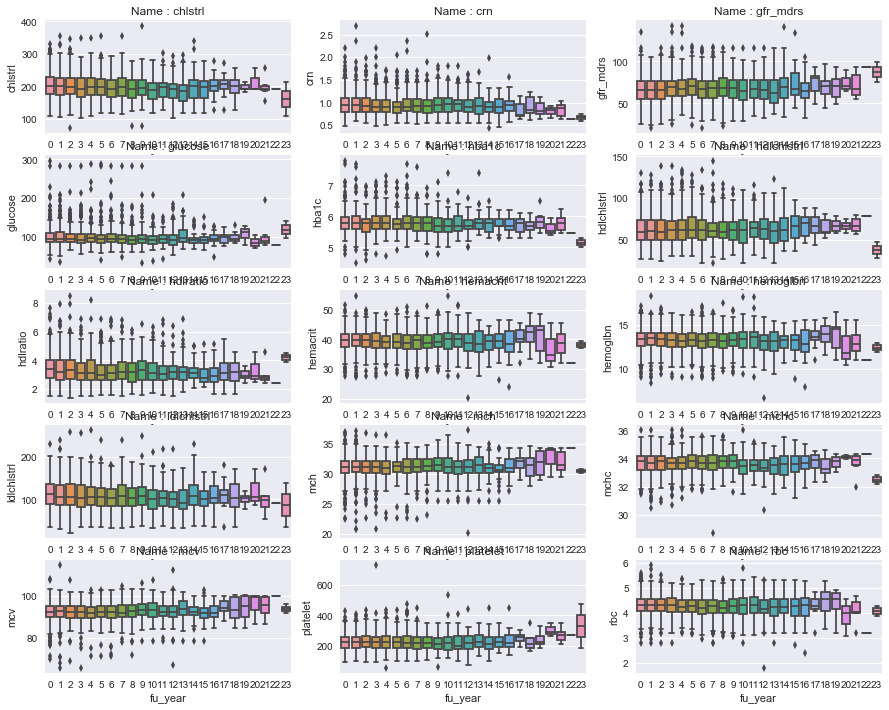

In [34]:
fig = plt.figure(figsize=(15,12))
i = 1
for name in list_of_columns:
    fig.add_subplot(5, 3, i)
    plt.title('Name : {}'.format(name))
    sns.boxplot(x="fu_year", y=name, data=df_everypatient)
    i += 1

In [35]:
temp_list = result_list_of_df[:]
patient_dfbyid_diagnosed, patient_dfbyid_not_diagnosed = \
patient_diagnosis(temp_list)

print(patient_dfbyid_diagnosed[0])
print("=================")
print(patient_dfbyid_not_diagnosed[0])

    projid study  fu_year scaled_to   ca  chlstrl   crn   gfr_mdrs  glucose  \
6   285563  MAP         2    ROSMAP  9.9    230.0  0.80  72.199053     85.0   
7   285563  MAP         5    ROSMAP  9.4    263.0  0.86  65.968070     94.0   
8   285563  MAP         6    ROSMAP  9.4    276.0  0.99  55.950658    105.0   
9   285563  MAP         7    ROSMAP  9.3    232.0  0.78  73.503240     94.0   
10  285563  MAP         9    ROSMAP  9.7    246.0  0.90  62.042574     86.0   

    hba1c       ...        other_dietary_rx  vitamin_minerals_rx  vitamin_rx  \
6   5.575       ...                     0.0                  1.0         0.0   
7   5.600       ...                     0.0                  1.0         0.0   
8   5.600       ...                     0.0                  0.0         0.0   
9   5.500       ...                     0.0                  0.0         0.0   
10  5.600       ...                     0.0                  0.0         0.0   

    alphablocker_rx  benign_pros_hyper_rx  b

In [36]:
#for column_names in list_of_columns:
#    print("looped {}".format(column_names))
#list_of_columns
list_of_columns = ['chlstrl','crn','gfr_mdrs','glucose','hba1c','hdlchlstrl', 'hdlratio','hemacrit','hemoglbn',
'ldlchlstrl',
'mch',
'mchc',
'mcv',
'platelet', 'rbc']
def getbloodanalysis(list_of_df, target = ""):
    list_of_df_copy= list_of_df[:]
    temp_list = []
    for df in  list_of_df_copy:
        temp_list.append(df.iloc[0][target])
    return temp_list # number list

#for df in result_list_of_df:
#    print(df.iloc[0]["chlstrl"])
holderList = []
for names in list_of_columns:
    holderList.append(getbloodanalysis(result_list_of_df,names))


print(len(holderList))

temp_df = pd.DataFrame({
    "chlstrl": holderList[0],
    "crn" : holderList[1],
    "gfr_mdrs" : holderList[2],
    "glucose" : holderList[3],
    "hba1c" : holderList[4],
    "hdlchlstrl" : holderList[5],
    "hdlratio'" : holderList[6],
    "hemacrit'" : holderList[7],
    "hemoglbn" : holderList[8],
    "ldlchlstrl" : holderList[9],
    "mch" : holderList[10],
    "mchc'" : holderList[11],
    "mcv" : holderList[12],
    "platelet" : holderList[13],
    "rbc" : holderList[14],
   
    
})

15


In [78]:
json=temp_df.to_json()
print(json)
with open("data.txt",'w') as outfile: ## since it takes a lot of time to process
    #we created a json file to load the data later
    outfile.write(json) ## we have to convert it back to data frame

{"chlstrl":{"0":215.4,"1":230.0,"2":150.0,"3":237.0,"4":196.0,"5":235.0,"6":167.0,"7":192.0,"8":143.0,"9":null,"10":null,"11":267.0,"12":225.0,"13":156.0,"14":212.0,"15":206.0,"16":155.0,"17":221.0,"18":183.0,"19":168.0,"20":152.0,"21":153.0,"22":200.0,"23":223.0,"24":194.0,"25":207.0,"26":155.0,"27":205.0,"28":null,"29":150.5,"30":179.0,"31":187.0,"32":227.6,"33":null,"34":119.0,"35":139.0,"36":196.0,"37":186.0,"38":233.0,"39":207.0,"40":160.0,"41":null,"42":174.0,"43":189.0,"44":181.0,"45":259.0,"46":null,"47":226.0,"48":176.0,"49":194.0,"50":294.0,"51":124.0,"52":148.0,"53":null,"54":196.0,"55":228.0,"56":null,"57":173.0,"58":176.0,"59":154.0,"60":182.0,"61":158.0,"62":null,"63":247.0,"64":173.0,"65":201.0,"66":null,"67":168.0,"68":null,"69":null,"70":null,"71":null,"72":183.6666666667,"73":null,"74":null,"75":null,"76":null,"77":null,"78":null,"79":null,"80":null,"81":156.0,"82":null,"83":null,"84":null,"85":163.6666666667,"86":null,"87":null,"88":null,"89":null,"90":null,"91":null

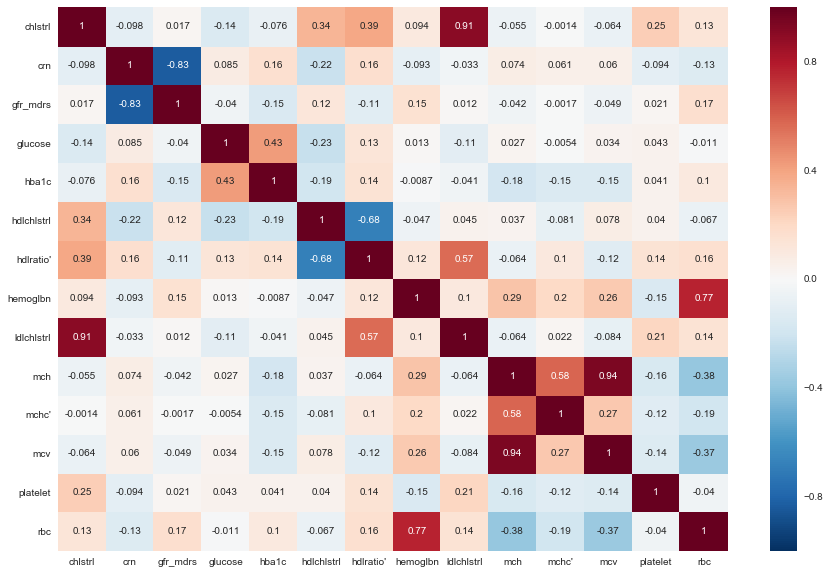

In [49]:

rcParams['figure.figsize'] = 5, 5
##df2= pd.DataFrame(analysis_result_DF_list[0])
Bloodmeasure = temp_df.filter(['chlstrl','crn','gfr_mdrs','glucose','hba1c','hdlchlstrl', 'hdlratio\'','hemacrit','hemoglbn',
'ldlchlstrl',
'mch',
'mchc\'',
'mcv',
'platelet', 'rbc'], axis=1)

corr_matrix =Bloodmeasure.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix,annot=True)

In [50]:
# df_everypatient
def single_out_age_group(result_list_of_df):
    #pd.DataFrame(columns=df_column_names)
    df_column_names = list(result_list_of_df[0]) # get the name and create a new empty DF for return
    return_dataframe = pd.DataFrame(columns = df_column_names)
    for each_dataframe in result_list_of_df:
        for row_number in range(each_dataframe.shape[0]):
            if each_dataframe.iloc[row_number]["fu_year"] == 1 and \
            80<= each_dataframe.iloc[row_number]["age_at_visit"] < 90 and\
            each_dataframe.iloc[row_number]["dcfdx"]==1:
                return_dataframe = \
                return_dataframe.append(each_dataframe.iloc[row_number], ignore_index = True)
            else:
                pass
    return return_dataframe
    

In [51]:
# df_everypatient
def single_out_age_group2(result_list_of_df):
    """dcfdx=2, fu_year=2, age= same"""
    #pd.DataFrame(columns=df_column_names)
    df_column_names = list(result_list_of_df[0]) # get the name and create a new empty DF for return
    return_dataframe = pd.DataFrame(columns = df_column_names)
    for each_dataframe in result_list_of_df:
        for row_number in range(each_dataframe.shape[0]):
            if each_dataframe.iloc[row_number]["fu_year"] == 2 and \
            80<= each_dataframe.iloc[row_number]["age_at_visit"] < 90 and \
            each_dataframe.iloc[row_number]["dcfdx"]==2:
                return_dataframe = \
                return_dataframe.append(each_dataframe.iloc[row_number], ignore_index = True)
            else:
                pass
    return return_dataframe
    

In [53]:
#working_df_for_this_cell = single_out_age_group(result_list_of_df)
working_df_for_this_cell2 = single_out_age_group2(result_list_of_df)

      projid study fu_year scaled_to    ca  chlstrl       crn    gfr_mdrs  \
0    3380931  MAP        2    ROSMAP   9.1    187.0  0.930000   60.664051   
1    4319814  MAP        2    ROSMAP   9.5    220.0  0.990000   57.124937   
2    5689621  MAP        2    ROSMAP   NaN    248.0  0.833333   69.191104   
3   20120255  ROS        2    ROSMAP   NaN      NaN       NaN         NaN   
4   20214850  ROS        2    ROSMAP   NaN    182.0  0.800000   73.330061   
5   20561642  ROS        2    ROSMAP   NaN    171.0  0.900000   62.939059   
6   20929774  ROS        2    ROSMAP   NaN      NaN       NaN         NaN   
7   20934889  ROS        2    ROSMAP   NaN      NaN       NaN         NaN   
8   22100675  ROS        2    ROSMAP   NaN      NaN       NaN         NaN   
9   36830117  MAP        2    ROSMAP   9.8    201.0  1.500000   46.854269   
10  40530379  MAP        2    ROSMAP   NaN    150.0  1.000000   55.447251   
11  45115248  MAP        2    ROSMAP   9.1    154.0  0.900000   63.126291   

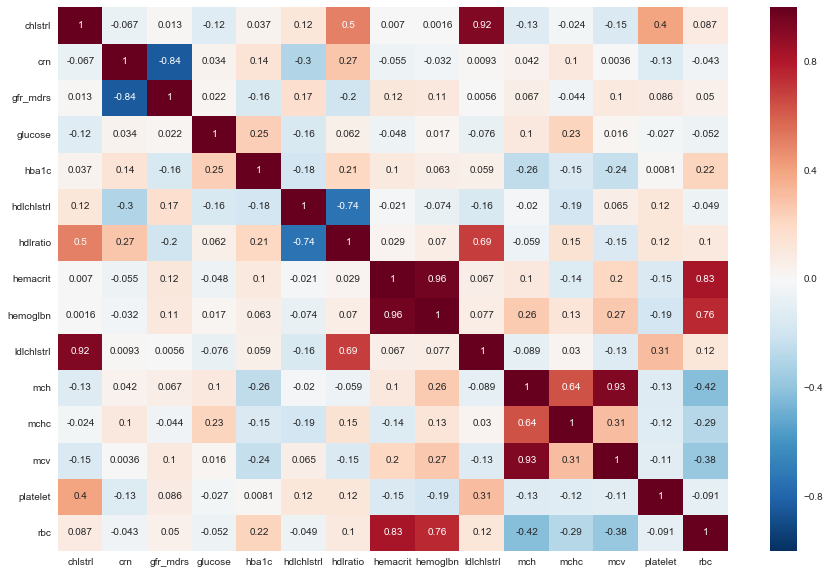

In [47]:
#grouped bar chart 


rcParams['figure.figsize'] = 5, 5
##df2= pd.DataFrame(analysis_result_DF_list[0])
Bloodmeasure = working_df_for_this_cell.filter(['chlstrl','crn','gfr_mdrs','glucose','hba1c','hdlchlstrl', 'hdlratio','hemacrit','hemoglbn',
'ldlchlstrl',
'mch',
'mchc',
'mcv',
'platelet', 'rbc'], axis=1)

corr_matrix =Bloodmeasure.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix,annot=True)

286


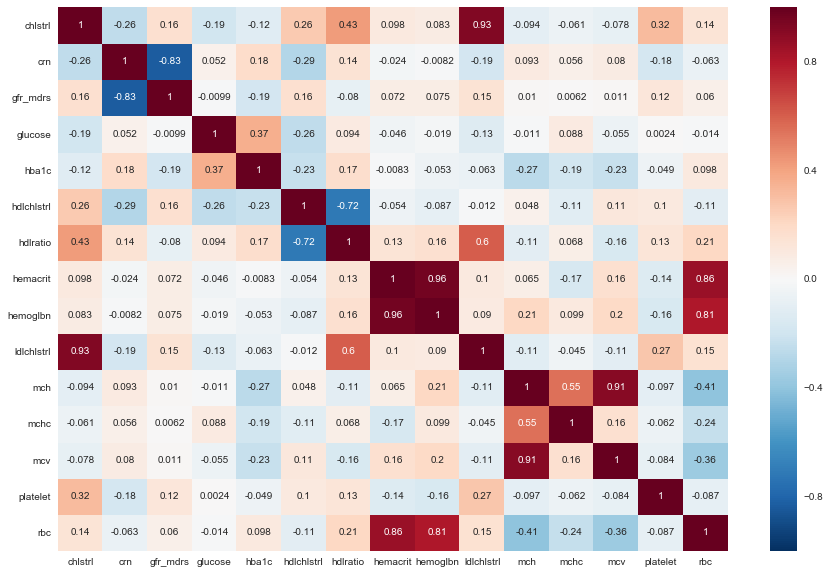

In [87]:
# df_everypatient
def single_out_age_group2(result_list_of_df):
    """dcfdx=2, fu_year=2, age= same"""
    #pd.DataFrame(columns=df_column_names)
    df_column_names = list(result_list_of_df[0]) # get the name and create a new empty DF for return
    return_dataframe = pd.DataFrame(columns = df_column_names)
    for each_dataframe in result_list_of_df:
        for row_number in range(each_dataframe.shape[0]):
            if each_dataframe.iloc[row_number]["fu_year"] == 2 and \
            65<= each_dataframe.iloc[row_number]["age_at_visit"] < 90 and \
            each_dataframe.iloc[row_number]["dcfdx"]==4:
                return_dataframe = \
                return_dataframe.append(each_dataframe.iloc[row_number], ignore_index = True)
            else:
                pass
    return return_dataframe
working_df_for_this_cell3 = single_out_age_group2(result_list_of_df)
print(len(working_df_for_this_cell2))
rcParams['figure.figsize'] = 5, 5
##df2= pd.DataFrame(analysis_result_DF_list[0])
Bloodmeasure = working_df_for_this_cell2.filter(['chlstrl','crn','gfr_mdrs','glucose','hba1c','hdlchlstrl', 'hdlratio','hemacrit','hemoglbn',
'ldlchlstrl',
'mch',
'mchc',
'mcv',
'platelet', 'rbc'], axis=1)

corr_matrix =Bloodmeasure.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix,annot=True)

286


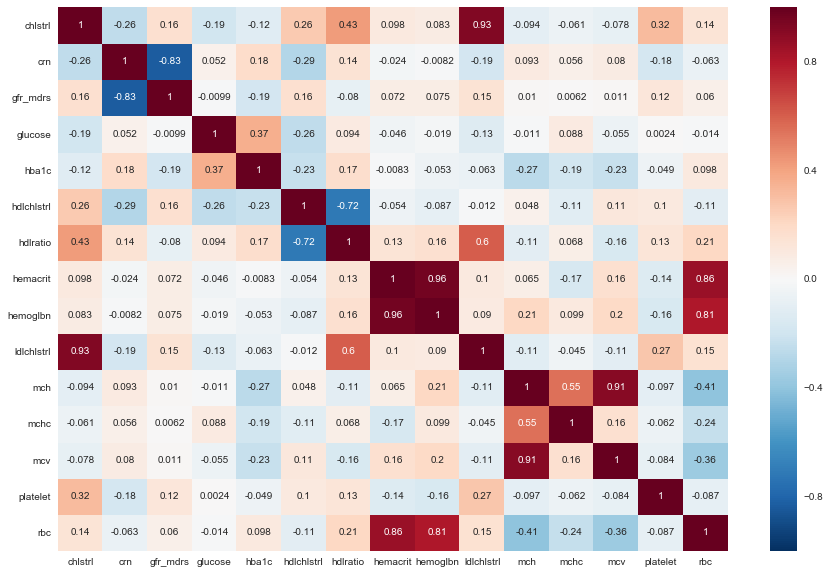

In [85]:
# df_everypatient
def single_out_age_group3(result_list_of_df):
    """dcfdx=2, fu_year=2, age= same"""
    #pd.DataFrame(columns=df_column_names)
    df_column_names = list(result_list_of_df[0]) # get the name and create a new empty DF for return
    return_dataframe = pd.DataFrame(columns = df_column_names)
    for each_dataframe in result_list_of_df:
        for row_number in range(each_dataframe.shape[0]):
            if each_dataframe.iloc[row_number]["fu_year"] == 1 and \
            65 <= each_dataframe.iloc[row_number]["age_at_visit"] < 90 and \
            each_dataframe.iloc[row_number]["dcfdx"]==1:
                return_dataframe = \
                return_dataframe.append(each_dataframe.iloc[row_number], ignore_index = True)
            else:
                pass
    return return_dataframe
working_df_for_this_cell2 = single_out_age_group3(result_list_of_df)
print(len(working_df_for_this_cell2))
rcParams['figure.figsize'] = 5, 5
##df2= pd.DataFrame(analysis_result_DF_list[0])
Bloodmeasure = working_df_for_this_cell2.filter(['chlstrl','crn','gfr_mdrs','glucose','hba1c','hdlchlstrl', 'hdlratio','hemacrit','hemoglbn',
'ldlchlstrl',
'mch',
'mchc',
'mcv',
'platelet', 'rbc'], axis=1)

corr_matrix =Bloodmeasure.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix,annot=True)

In [118]:
df1=working_df_for_this_cell2.append(working_df_for_this_cell3)
##x = pd.melt(df1, id_vars=df1['dcfdx'],value_name=df1['hba1c'])

#df1['x']=df1.iloc[:]['projid']

ax=sns.barplot(x='fu_year', y='hba1c', hue='dcfdx', data=temp_df)

ValueError: Could not interpret input 'fu_year'